# Inference Tutorial
First, we have to import the dependencies needed and initialize the detector as well as the post-processing pipeline.

In [1]:
from PIL import Image
import numpy as np
import sys
sys.path.append('..')

import src.layoutparser.models.detectron2.layoutmodel as lp
import src.layoutparser.visualization as viz
import src.layoutparser.ocr.tesseract_agent as tes

from seg_post_process.post_segmentation import PostProcessingSegmentation

The model and its config can be downloaded from https://drive.google.com/drive/folders/15KNAPItTzDQwu-t5clvVq3b_JmhEI7th?usp=sharing

In [2]:
model = lp.Detectron2LayoutModel(
            config_path = '../3_class_model/config.yaml',
            model_path  = '../3_class_model/model_final.pth',
            label_map   = {1:"Paragraph", 2:"OtherText", 3:"Visual"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )
    
ocr_agent = tes.TesseractAgent(languages='eng') 

In [8]:
im = Image.open('../00000691.tif')

layout = model.detect(im)

masks = model.masks(im)

/home/georgi006/anaconda3/envs/layout/lib/python3.9/site-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [9]:
post = PostProcessingSegmentation(layout, im, masks,{1:"Paragraph", 2:"OtherText", 3:"Visual"})

In [10]:
image, boxes = post.pipeline(1)

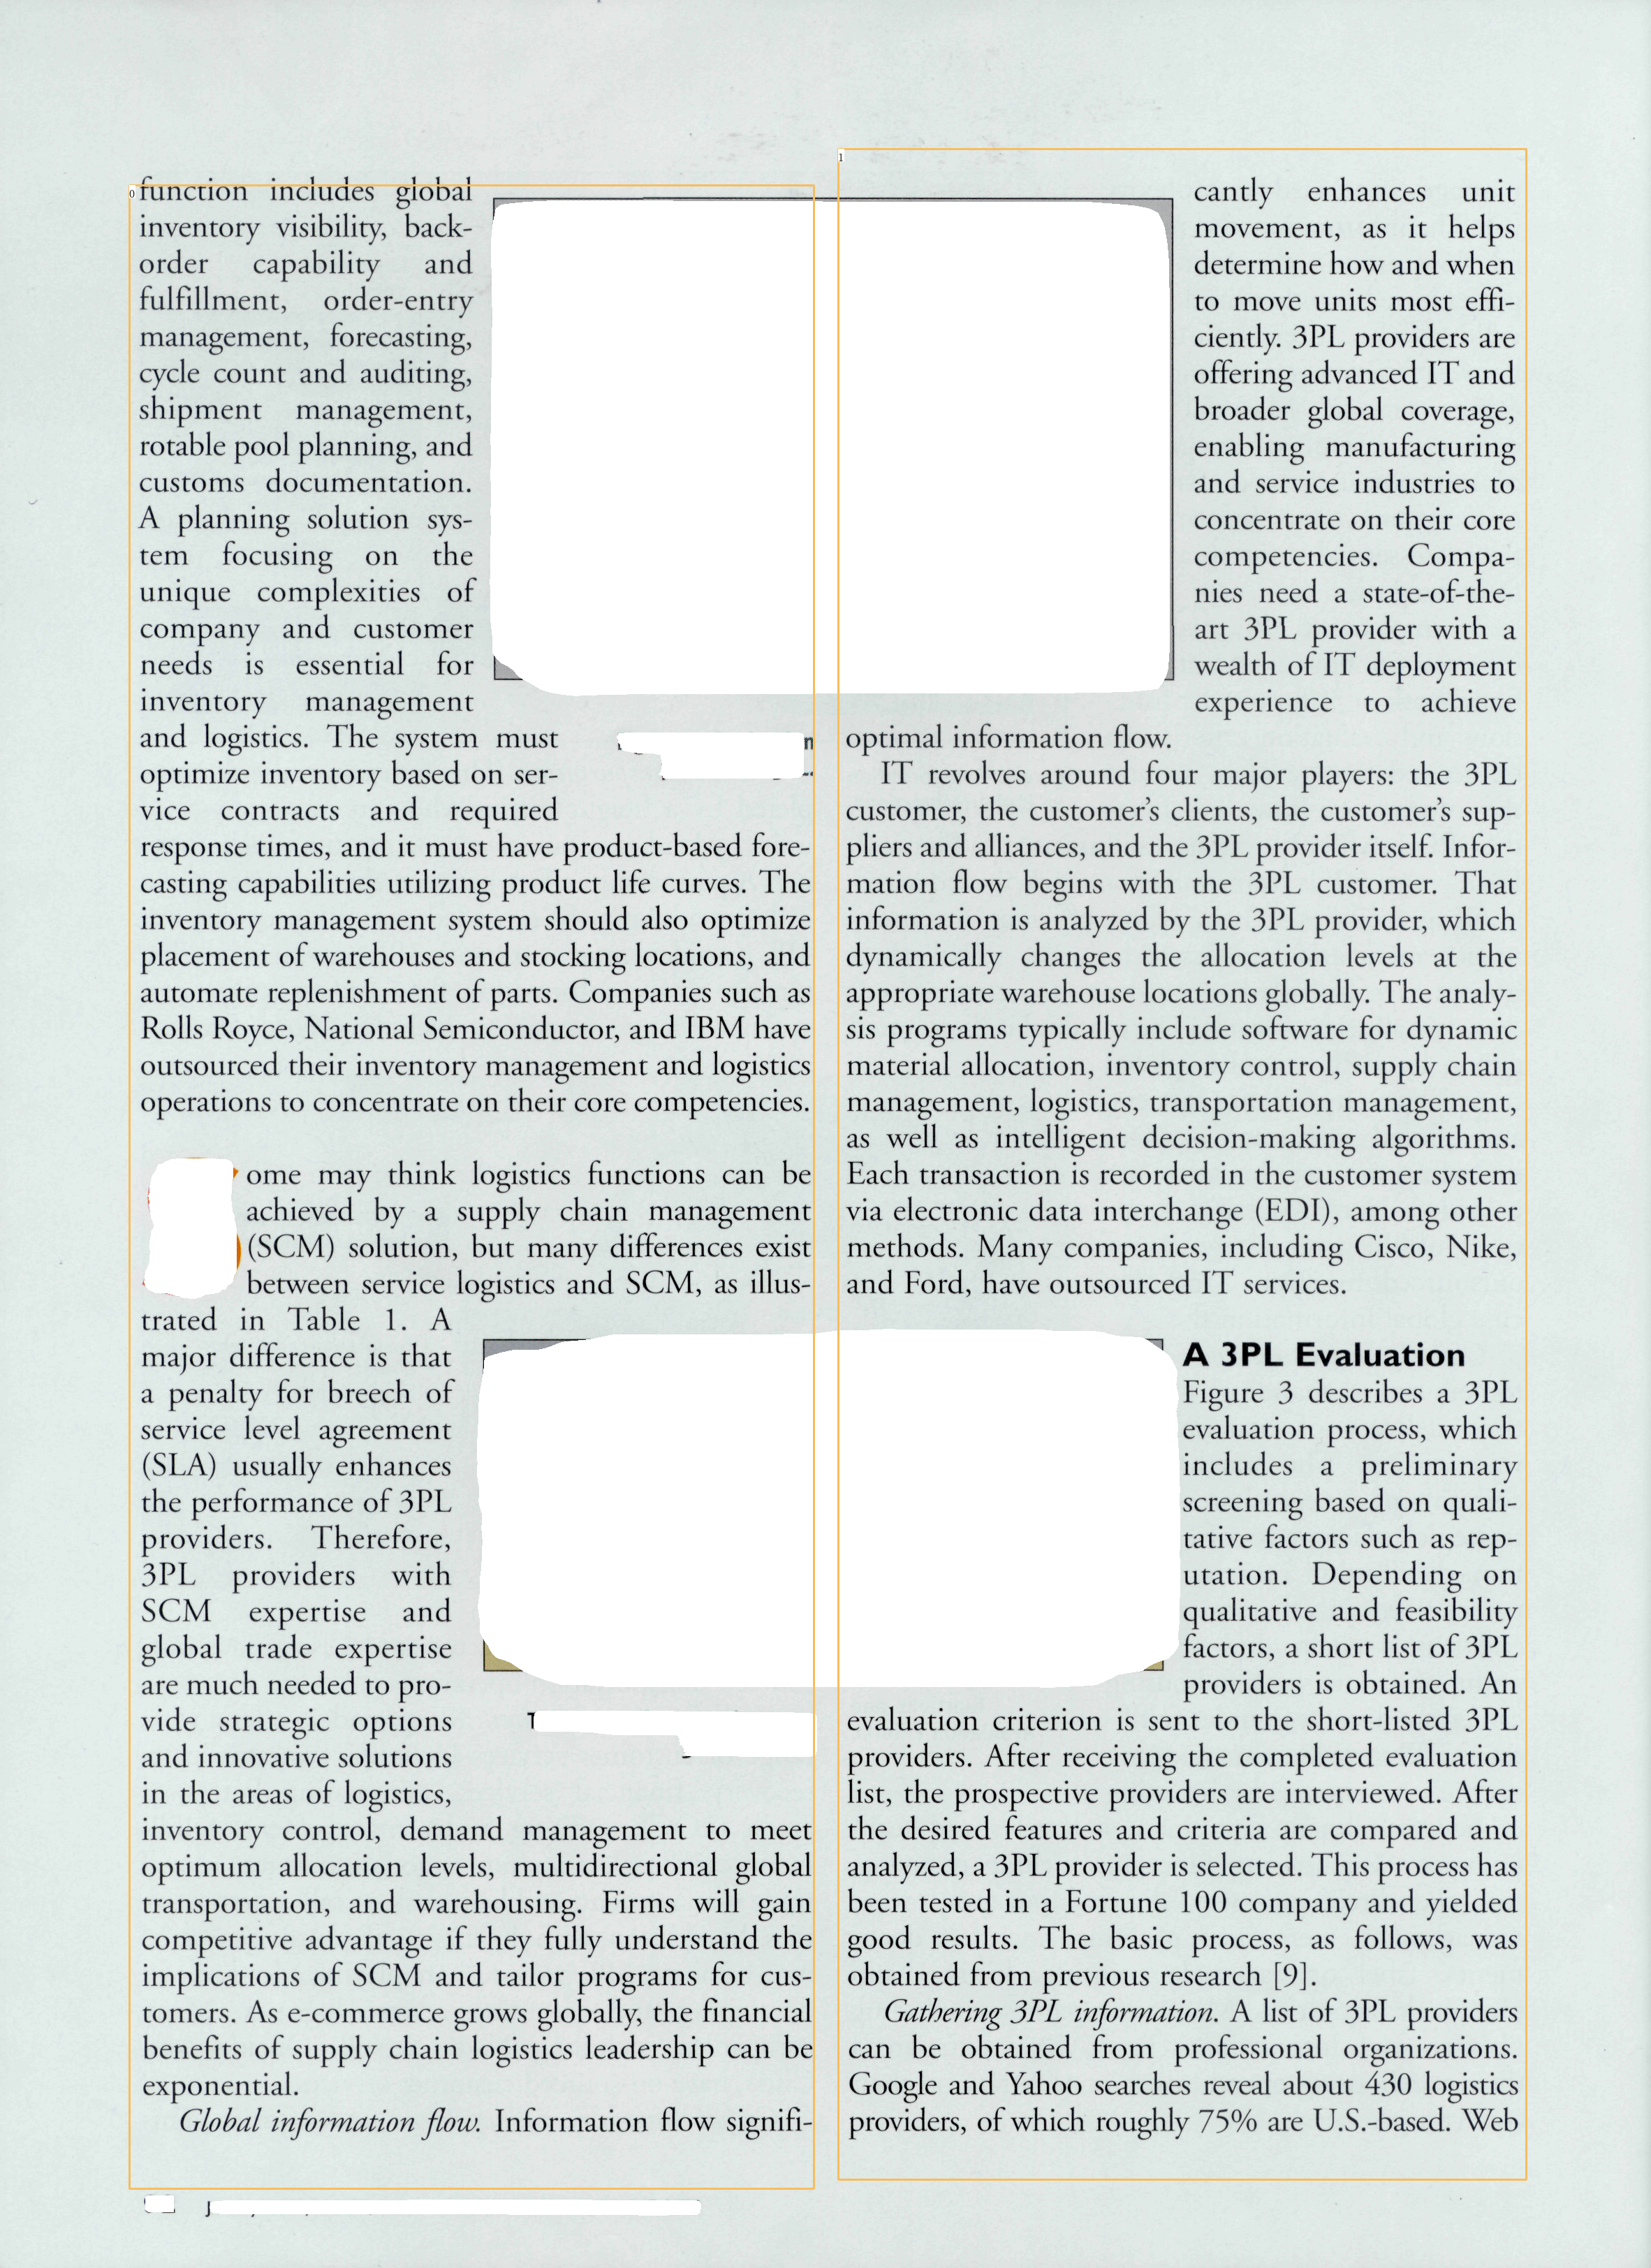

In [11]:
viz.draw_box(image, boxes,
            box_width=3, 
            show_element_id=True)

# OCR Engine
For the OCR engine Tesseract OCR is used, development of the engine has been sponsored by Google since 2006. We make API calls to the OCR for each ordered paragraph box.

In [12]:
arr_im = np.asarray(im)

for block in boxes:
    segment_image = (block.crop_image(arr_im))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)


for txt in boxes.get_texts():
    print(txt, end='\n---\n')

function imciudes glovpal
inventory visibility, back-
order capability and
fulfillment, order-entry
management, forecasting,
cycle count and auditing,
shipment management,
rotable pool planning, and
customs documentation.
A planning solution sys-
tem focusing on the
unique complexities of
company and customer
needs is essential for |x

inventory management

and logistics. The system must , n
optimize inventory based on ser- at
vice contracts and required

response times, and it must have product-based fore-
casting capabilities utilizing product life curves. The
inventory management system should also optimize
placement of warehouses and stocking locations, and
automate replenishment of parts. Companies such as
Rolls Royce, National Semiconductor, and IBM have
outsourced their inventory management and logistics
operations to concentrate on their core competencies.

re

rome may think logistics functions can be
achieved by a supply chain management
| (SCM) solution, but many differences